In [1]:

import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_csvs_from_folder(folder_path):
    dfs = []
    for file in sorted(os.listdir(folder_path)):
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            dfs.append(pd.read_csv(file_path))
    return pd.concat(dfs, ignore_index=True)


In [4]:
import os

dataset_root = r"C:\Users\shrav\Trends-in-Aadhaar-Enrolment-and-Update\Dataset"
enrolment_folder = os.path.join(dataset_root, "api_data_aadhar_enrolment")

df_enr= load_csvs_from_folder(enrolment_folder)

print("Enrolment shape:", df_enr.shape)

demographic_folder = os.path.join(dataset_root, "api_data_aadhar_demographic")

df_demo = load_csvs_from_folder(demographic_folder)

print("Demographic shape:", df_demo.shape)

biometric_folder = os.path.join(dataset_root, "api_data_aadhar_biometric")

df_bio= load_csvs_from_folder(biometric_folder)

print("Biometric shape:", df_bio.shape)



Enrolment shape: (1006029, 7)
Demographic shape: (2071700, 6)
Biometric shape: (1861108, 6)


In [5]:
for name, df in {
    "Enrolment": df_enr,
    "Demographic": df_demo,
    "Biometric": df_bio
}.items():
    print(
        name,
        df.duplicated(['date','state','district','pincode']).sum()
    )


Enrolment 22957
Demographic 473601
Biometric 94896


In [6]:
df_enr.describe()

,pincode,age_0_5,age_5_17,age_18_greater
count,1.006029e+06,1.006029e+06,1.006029e+06,1.006029e+06
mean,5.186415e+05,3.525709e+00,1.710074e+00,1.673441e-01
std,2.056360e+05,1.753851e+01,1.436963e+01,3.220525e+00
min,1.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.636410e+05,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.174170e+05,2.000000e+00,0.000000e+00,0.000000e+00
75%,7.001040e+05,3.000000e+00,1.000000e+00,0.000000e+00
max,8.554560e+05,2.688000e+03,1.812000e+03,8.550000e+02


In [7]:
df_demo.describe()

,pincode,demo_age_5_17,demo_age_17_
count,2.071700e+06,2.071700e+06,2.071700e+06
mean,5.278318e+05,2.347552e+00,2.144701e+01
std,1.972933e+05,1.490355e+01,1.252498e+02
min,1.000000e+05,0.000000e+00,0.000000e+00
25%,3.964690e+05,0.000000e+00,2.000000e+00
50%,5.243220e+05,1.000000e+00,6.000000e+00
75%,6.955070e+05,2.000000e+00,1.500000e+01
max,8.554560e+05,2.690000e+03,1.616600e+04


In [8]:
df_bio.describe()

,pincode,bio_age_5_17,bio_age_17_
count,1.861108e+06,1.861108e+06,1.861108e+06
mean,5.217612e+05,1.839058e+01,1.909413e+01
std,1.981627e+05,8.370421e+01,8.806502e+01
min,1.100010e+05,0.000000e+00,0.000000e+00
25%,3.911750e+05,1.000000e+00,1.000000e+00
50%,5.224010e+05,3.000000e+00,4.000000e+00
75%,6.866362e+05,1.100000e+01,1.000000e+01
max,8.554560e+05,8.002000e+03,7.625000e+03


In [9]:
df_bio['date'] = pd.to_datetime(df_bio['date'],dayfirst=True)
df_bio['pincode'] = df_bio['pincode'].astype(str)
df_demo['date'] = pd.to_datetime(df_demo['date'],dayfirst=True)
df_demo['pincode'] = df_demo['pincode'].astype(str)
df_enr['date'] = pd.to_datetime(df_enr['date'],dayfirst=True)
df_enr['pincode'] = df_enr['pincode'].astype(str)


In [10]:
df_enr = df_enr.drop_duplicates()
df_bio = df_bio.drop_duplicates()
df_demo = df_demo.drop_duplicates()

In [11]:
df_enr.shape

(983072, 7)

In [12]:
df_bio.shape

(1766212, 6)

In [13]:
df_demo.shape

(1598099, 6)

In [14]:
df_enr = df_enr.groupby(
    ['date','state','district','pincode'],
    as_index=False
).sum()
df_enr.shape

(983072, 7)

In [15]:
df_bio = df_bio.groupby(
    ['date','state','district','pincode'],
    as_index=False
).sum()
df_bio.shape


(1766212, 6)

In [16]:
df_demo = df_demo.groupby(
    ['date','state','district','pincode'],
    as_index=False
).sum()
df_demo.shape


(1598099, 6)

In [17]:
if df_demo.duplicated(['date','state','district','pincode']).sum() == 0:
    print("true")


true


In [18]:
# Age columns must be non-negative
(df_bio[['bio_age_5_17','bio_age_17_']] >= 0).all()
    


bio_age_5_17    True
bio_age_17_     True
dtype: bool

In [19]:
df_final = df_enr.merge(
    df_demo,
    on=['date','state','district','pincode'],
    how='outer'
)


In [20]:
df_final = df_final.merge(
    df_bio,
    on=['date','state','district','pincode'],
    how='outer'
)


In [21]:
df_final.isna().sum().sort_values(ascending=False)


age_0_5           1347396
age_5_17          1347396
age_18_greater    1347396
demo_age_5_17      732369
demo_age_17_       732369
bio_age_5_17       564256
bio_age_17_        564256
date                    0
state                   0
district                0
pincode                 0
dtype: int64

In [22]:
df_final.isna().mean().sort_values(ascending=False)


age_0_5           0.578165
age_5_17          0.578165
age_18_greater    0.578165
demo_age_5_17     0.314258
demo_age_17_      0.314258
bio_age_5_17      0.242121
bio_age_17_       0.242121
date              0.000000
state             0.000000
district          0.000000
pincode           0.000000
dtype: float64

In [23]:
count_cols = [
    col for col in df_final.columns
    if col not in ['date', 'state', 'district', 'pincode']
]

df_final[count_cols] = df_final[count_cols].fillna(0)


In [24]:
df_final.head

<bound method NDFrame.head of               date        state                    district pincode  age_0_5  \
0       2025-03-02    Meghalaya            East Khasi Hills  793121     11.0   
1       2025-03-09        Bihar                   Bhagalpur  812005     13.0   
2       2025-03-09        Bihar                   Madhubani  847108     18.0   
3       2025-03-09        Bihar             Purbi Champaran  845304     18.0   
4       2025-03-09        Bihar             Purbi Champaran  845418     30.0   
...            ...          ...                         ...     ...      ...   
2330463 2025-12-29  West Bengal              South Dinajpur  733153      0.0   
2330464 2025-12-29  West Bengal  South Twenty Four Parganas  743348      0.0   
2330465 2025-12-29  West Bengal  South Twenty Four Parganas  743610      0.0   
2330466 2025-12-29  West Bengal              West Midnapore  721146      0.0   
2330467 2025-12-29  West Bengal              West Midnapore  721303      0.0   

         

In [26]:
df_final.to_csv(r"C:\Users\shrav\Trends-in-Aadhaar-Enrolment-and-Update\Preprocessing\cleaned_aadhaar.csv", index=False)


In [27]:
print(df_final.shape)
df_final.head()


(2330468, 11)


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,demo_age_5_17,demo_age_17_,bio_age_5_17,bio_age_17_
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11.0,61.0,37.0,0.0,0.0,0.0,0.0
1,2025-03-09,Bihar,Bhagalpur,812005,13.0,40.0,18.0,0.0,0.0,0.0,0.0
2,2025-03-09,Bihar,Madhubani,847108,18.0,120.0,22.0,0.0,0.0,0.0,0.0
3,2025-03-09,Bihar,Purbi Champaran,845304,18.0,72.0,12.0,0.0,0.0,0.0,0.0
4,2025-03-09,Bihar,Purbi Champaran,845418,30.0,48.0,10.0,0.0,0.0,0.0,0.0


In [28]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330468 entries, 0 to 2330467
Data columns (total 11 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   state           object        
 2   district        object        
 3   pincode         object        
 4   age_0_5         float64       
 5   age_5_17        float64       
 6   age_18_greater  float64       
 7   demo_age_5_17   float64       
 8   demo_age_17_    float64       
 9   bio_age_5_17    float64       
 10  bio_age_17_     float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 195.6+ MB


In [29]:
df_final.isnull().sum().sort_values(ascending=False)


date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
demo_age_5_17     0
demo_age_17_      0
bio_age_5_17      0
bio_age_17_       0
dtype: int64

In [30]:
print("Duplicate rows:", df_final.duplicated().sum())


Duplicate rows: 0


In [31]:
df_final.describe()


,date,age_0_5,age_5_17,age_18_greater,demo_age_5_17,demo_age_17_,bio_age_5_17,bio_age_17_
count,2330468,2.330468e+06,2.330468e+06,2.330468e+06,2.330468e+06,2.330468e+06,2.330468e+06,2.330468e+06
mean,2025-10-25 21:12:27.877251328,1.490855e+00,7.255663e-01,7.142857e-02,1.543783e+00,1.416017e+01,1.435619e+01,1.493452e+01
min,2025-03-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2025-09-20 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2025-11-04 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
75%,2025-12-05 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,9.000000e+00,7.000000e+00,7.000000e+00
max,2025-12-31 00:00:00,2.688000e+03,1.812000e+03,8.550000e+02,2.690000e+03,1.616600e+04,8.002000e+03,7.625000e+03
std,NaN,1.164453e+01,9.475054e+00,2.116366e+00,1.157376e+01,9.794304e+01,7.514880e+01,7.906867e+01


In [32]:
df_final.nunique().sort_values(ascending=False)


pincode           19815
demo_age_17_       2668
bio_age_17_        2212
bio_age_5_17       2121
district           1029
age_0_5             671
age_5_17            624
demo_age_5_17       614
age_18_greater      199
date                115
state                68
dtype: int64

In [33]:
df_final.duplicated(['date','state','district','pincode']).sum()


0

In [34]:
df_final["total_enrolment"] = (
    df_final["age_0_5"] +
    df_final["age_5_17"] +
    df_final["age_18_greater"]
)


In [35]:
monthly_ts = df_final.groupby(pd.Grouper(key="date", freq="M"))["total_enrolment"].sum().reset_index()
monthly_ts.head()


,date,total_enrolment
0,2025-03-31,16582.0
1,2025-04-30,257438.0
2,2025-05-31,183616.0
3,2025-06-30,215734.0
4,2025-07-31,616868.0


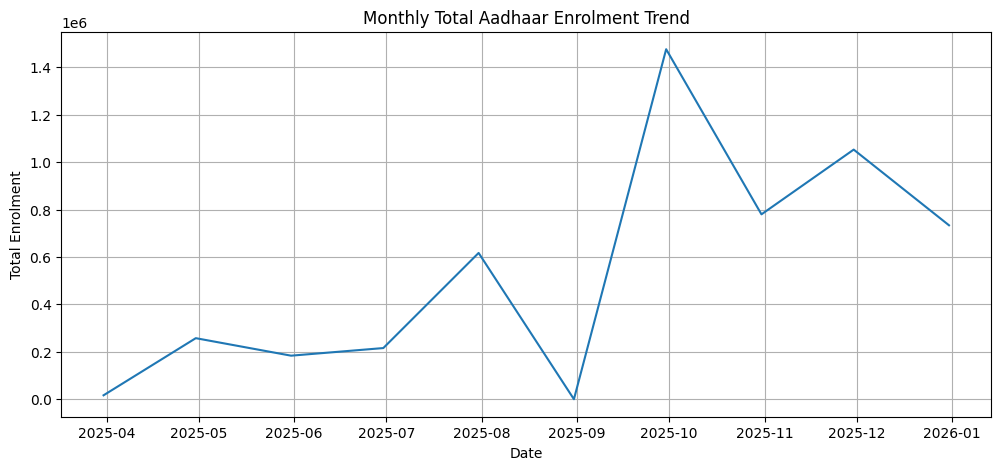

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(monthly_ts["date"], monthly_ts["total_enrolment"])
plt.title("Monthly Total Aadhaar Enrolment Trend")
plt.xlabel("Date")
plt.ylabel("Total Enrolment")
plt.grid(True)
plt.show()


In [37]:
df = df_final.copy()

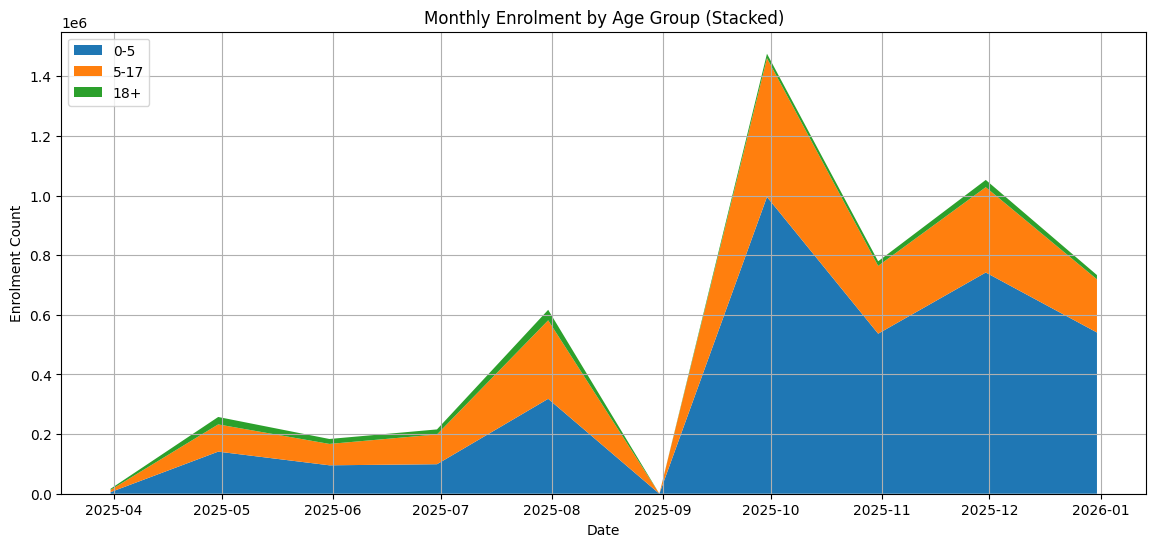

In [38]:
monthly_age = df.groupby(pd.Grouper(key="date", freq="M"))[
    ["age_0_5", "age_5_17", "age_18_greater"]
].sum().reset_index()

plt.figure(figsize=(14,6))
plt.stackplot(
    monthly_age["date"],
    monthly_age["age_0_5"],
    monthly_age["age_5_17"],
    monthly_age["age_18_greater"],
    labels=["0-5", "5-17", "18+"]
)
plt.title("Monthly Enrolment by Age Group (Stacked)")
plt.xlabel("Date")
plt.ylabel("Enrolment Count")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


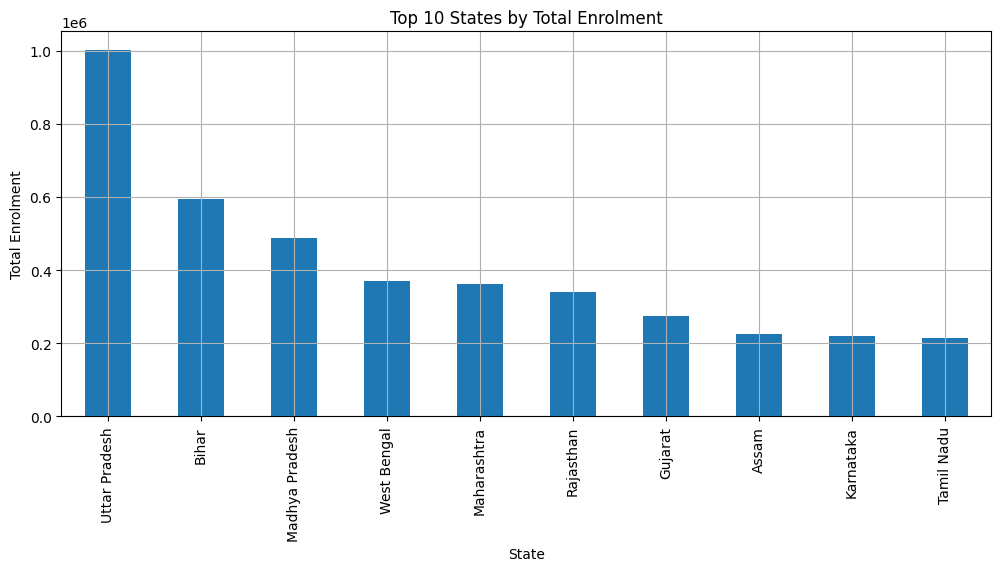

In [39]:
top_states = df.groupby("state")["total_enrolment"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
top_states.plot(kind="bar")
plt.title("Top 10 States by Total Enrolment")
plt.xlabel("State")
plt.ylabel("Total Enrolment")
plt.grid(True)
plt.show()
